In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

hit points are: 
[[ 65  33]
 [240  33]
 [487  33]]


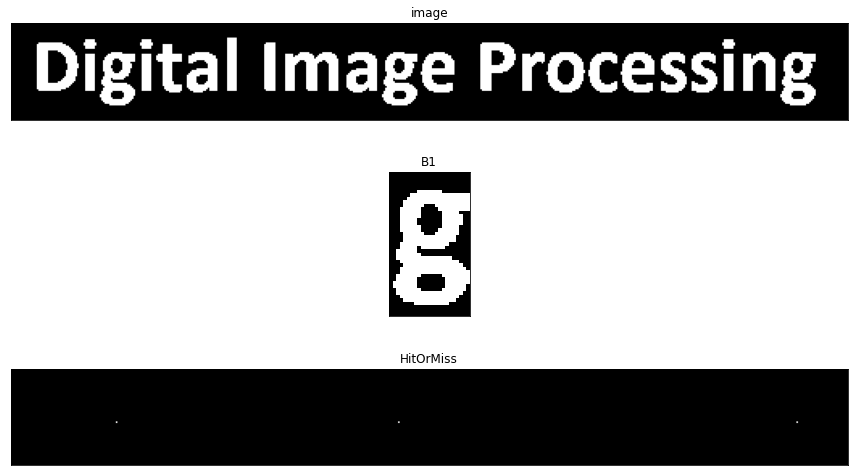

In [11]:
img = cv2.imread(filename="text.png", flags=cv2.IMREAD_GRAYSCALE)
thresh_val, img = cv2.threshold(src=img, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
img = np.array(cv2.normalize(img.astype('uint8'), None, 0, 1, cv2.NORM_MINMAX))

# kernel
B1 = cv2.imread(filename="kernel.png", flags=cv2.IMREAD_GRAYSCALE)
thresh_val, B1 = cv2.threshold(src=B1, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
B1 = np.array(cv2.normalize(B1.astype('uint8'), None, 0, 1, cv2.NORM_MINMAX))

[m, n] = B1.shape
B2 = np.zeros((m,n),dtype=np.uint8)
B2 = cv2.copyMakeBorder( B2, 1, 1, 1, 1, borderType=cv2.BORDER_CONSTANT, value=1)

invert_img = ~img 

tB1 = cv2.erode(img, B1 ,iterations = 1)
tB2 = cv2.erode(invert_img, B2 ,iterations = 1)

HitOrMiss = tB1 & tB2
y,x=np.where(HitOrMiss==1)
hit_points = np.vstack((x,y)).T

print('hit points are: \n{}'.format(hit_points))

fig, axes = plt.subplots(3,1, figsize=(15,9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title("image")

axes[1].imshow(B1, 'gray')
axes[1].set_title("B1")

axes[2].imshow(HitOrMiss, 'gray')
axes[2].set_title("HitOrMiss")

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()